In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

#plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format

import warnings
warnings.filterwarnings('ignore')

In [2]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
downloaded = drive.CreateFile({'id': '1BFMOae6_mh0FAADOEAmMgKEyxVLnyLx-'})
downloaded.GetContentFile('train_labels.csv')

downloaded = drive.CreateFile({'id': '1H-6GzuPgEkHrJuA0ZN932tyAynasX231'})
downloaded.GetContentFile('train_values.csv')

In [5]:
trainLabels = pd.read_csv('train_labels.csv')
trainValues = pd.read_csv('train_values.csv')

In [6]:
trainValues

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,802906,6,487,12198,2,30,6,5,t,r,n,f,q,t,d,1,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
1,28830,8,900,2812,2,10,8,7,o,r,n,x,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
2,94947,21,363,8973,2,10,5,5,t,r,n,f,x,t,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
3,590882,22,418,10694,2,10,6,5,t,r,n,f,x,s,d,0,1,0,0,0,0,1,1,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
4,201944,11,131,1488,3,30,8,9,t,r,n,f,x,s,d,1,0,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,n,f,j,s,q,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260597,669485,17,715,2060,2,0,6,5,t,r,n,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260598,602512,17,51,8163,3,55,6,7,t,r,q,f,q,s,d,0,1,0,0,0,0,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0
260599,151409,26,39,1851,2,10,14,6,t,r,x,v,s,j,d,0,0,0,0,0,1,0,0,0,0,0,v,1,0,0,0,0,0,0,0,0,0,0,0


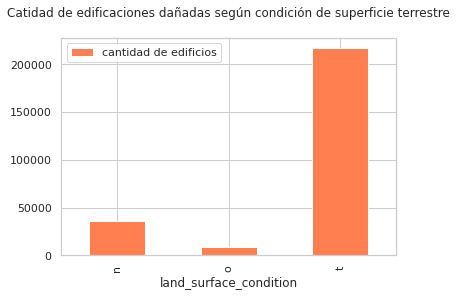

In [7]:
land_surface_conditions = trainValues.loc[:, ['building_id', 'land_surface_condition']].groupby('land_surface_condition').count()
land_surface_conditions.columns = ['cantidad de edificios']
land_surface_conditions.plot(kind="bar", title="Catidad de edificaciones dañadas según condición de superficie terrestre\n", color="Coral")

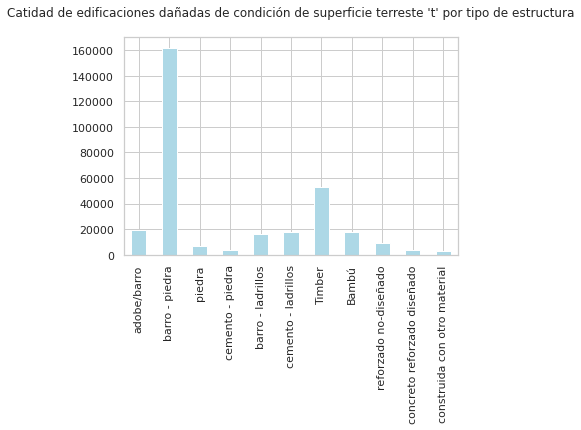

In [8]:
surface_condition_T_materials = trainValues.loc[trainValues['land_surface_condition'] == 't']
surface_condition_T_materials = surface_condition_T_materials.iloc[:, pd.np.r_[0, 15:26]]
surface_condition_T_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
surface_condition_T_materials = surface_condition_T_materials.set_index('building_id').sum()
surface_condition_T_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de condición de superficie terreste 't' por tipo de estructura\n", color="lightBlue")

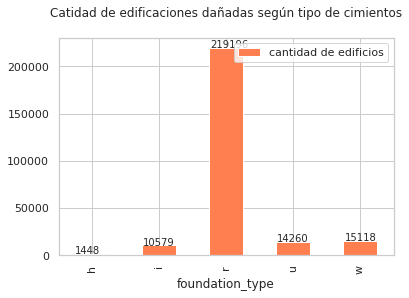

In [9]:
foundation_type = trainValues.loc[:, ['building_id', 'foundation_type']].groupby('foundation_type').count()
foundation_type.columns = ['cantidad de edificios']
ax = foundation_type.plot(kind="bar", title="Catidad de edificaciones dañadas según tipo de cimientos\n", color="Coral")

plt.rcParams["figure.figsize"] = [1, 10]
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

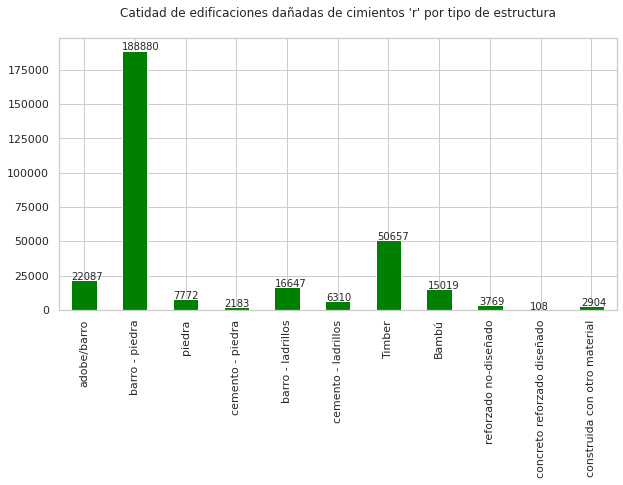

In [11]:
foundation_type_R_materials = trainValues.loc[trainValues['foundation_type'] == 'r']
foundation_type_R_materials = foundation_type_R_materials.iloc[:, pd.np.r_[0, 15:26]]
foundation_type_R_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_R_materials = foundation_type_R_materials.set_index('building_id').sum()
ax = foundation_type_R_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de cimientos 'r' por tipo de estructura\n", color="Green")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

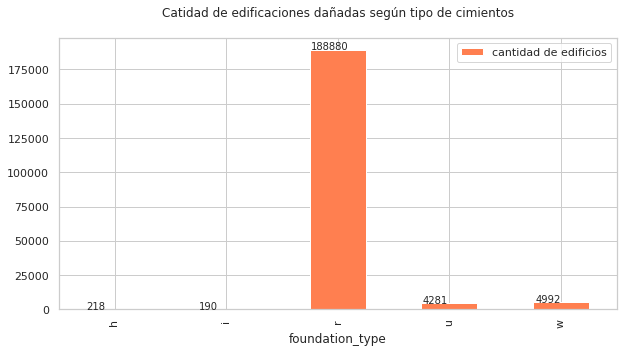

In [12]:
mortar_stone = trainValues.loc[trainValues['has_superstructure_mud_mortar_stone'] == 1]
mortar_stone = mortar_stone.loc[:, ['building_id', 'foundation_type']].groupby('foundation_type').count()
mortar_stone.columns = ['cantidad de edificios']
ax = mortar_stone.plot(kind="bar", title="Catidad de edificaciones dañadas según tipo de cimientos\n", color="Coral")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

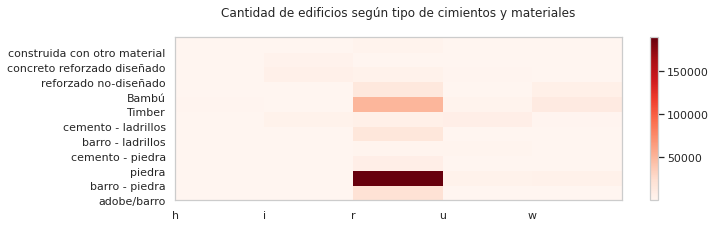

In [14]:
foundation_type_materials = trainValues.iloc[:, pd.np.r_[0, 9, 15:26]]
foundation_type_materials.columns = ['building_id', 'foundation_type', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_materials=foundation_type_materials.groupby(['building_id', 'foundation_type']).sum().reset_index().iloc[:, 1:13].groupby('foundation_type').sum()


foundation_type_materials = foundation_type_materials.transpose()
plt.pcolor(foundation_type_materials, cmap ="Reds")
plt.yticks(range(len(foundation_type_materials.index)), foundation_type_materials.index)
plt.xticks(range(len(foundation_type_materials.columns)), foundation_type_materials.columns)
plt.colorbar()
plt.title("Cantidad de edificios según tipo de cimientos y materiales\n")
plt.show()

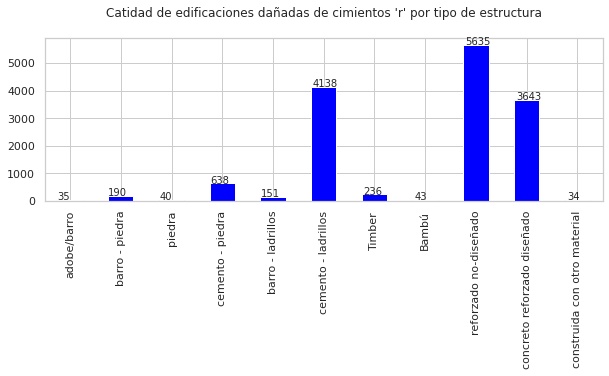

In [15]:
foundation_type_I_materials = trainValues.loc[trainValues['foundation_type'] == 'i']
foundation_type_I_materials = foundation_type_I_materials.iloc[:, pd.np.r_[0, 15:26]]
foundation_type_I_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_I_materials = foundation_type_I_materials.set_index('building_id').sum()
ax = foundation_type_I_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de cimientos 'r' por tipo de estructura\n", color="Blue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

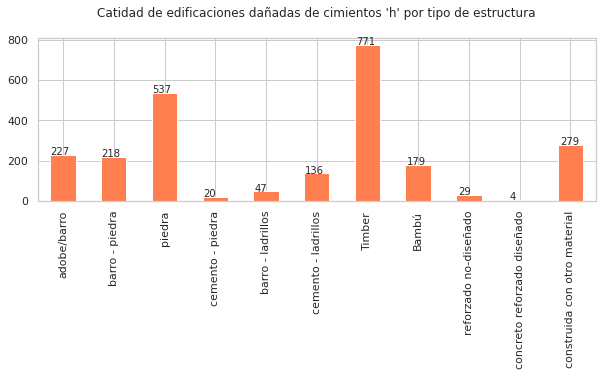

In [16]:
foundation_type_H_materials = trainValues.loc[trainValues['foundation_type'] == 'h']
foundation_type_H_materials = foundation_type_H_materials.iloc[:, pd.np.r_[0, 15:26]]
foundation_type_H_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_H_materials = foundation_type_H_materials.set_index('building_id').sum()
ax = foundation_type_H_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de cimientos 'h' por tipo de estructura\n", color="Coral")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

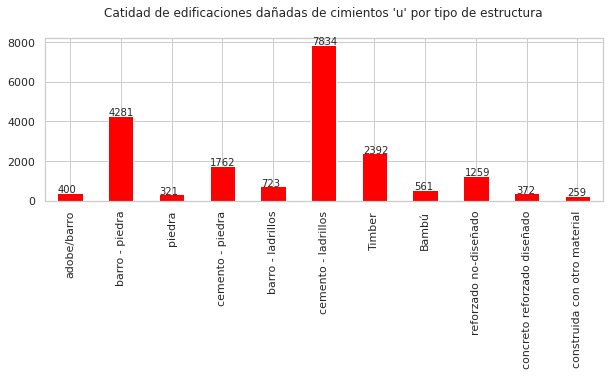

In [17]:
foundation_type_U_materials = trainValues.loc[trainValues['foundation_type'] == 'u']
foundation_type_U_materials = foundation_type_U_materials.iloc[:, pd.np.r_[0, 15:26]]
foundation_type_U_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_U_materials = foundation_type_U_materials.set_index('building_id').sum()
ax = foundation_type_U_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de cimientos 'u' por tipo de estructura\n", color="Red")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

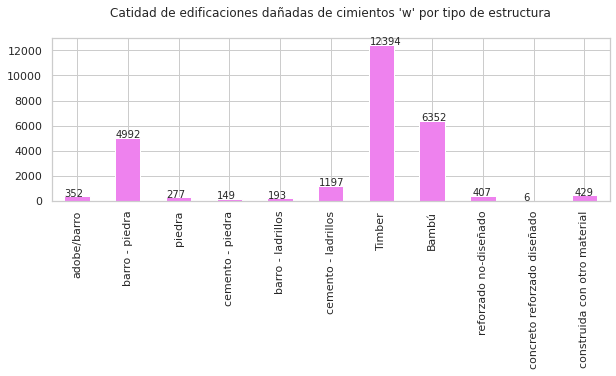

In [18]:
foundation_type_W_materials = trainValues.loc[trainValues['foundation_type'] == 'w']
foundation_type_W_materials = foundation_type_W_materials.iloc[:, pd.np.r_[0, 15:26]]
foundation_type_W_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
foundation_type_W_materials = foundation_type_W_materials.set_index('building_id').sum()
ax = foundation_type_W_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de cimientos 'w' por tipo de estructura\n", color="Violet")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

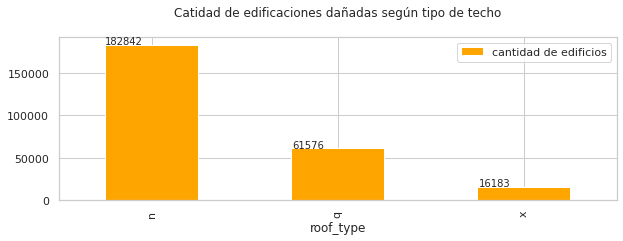

In [19]:
roof_types = trainValues.loc[:, ['building_id', 'roof_type']].groupby('roof_type').count()
roof_types.columns = ['cantidad de edificios']
ax = roof_types.plot(kind="bar", title="Catidad de edificaciones dañadas según tipo de techo\n", color="Orange")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

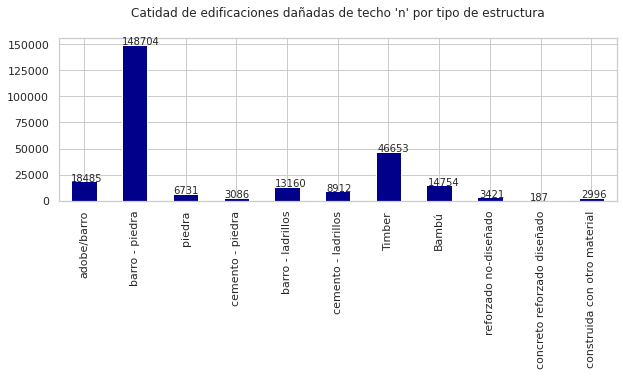

In [20]:
roof_types_N_materials = trainValues.loc[trainValues['roof_type'] == 'n']
roof_types_N_materials = roof_types_N_materials.iloc[:, pd.np.r_[0, 15:26]]
roof_types_N_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
roof_types_N_materials = roof_types_N_materials.set_index('building_id').sum()
ax = roof_types_N_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de techo 'n' por tipo de estructura\n", color="DarkBlue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

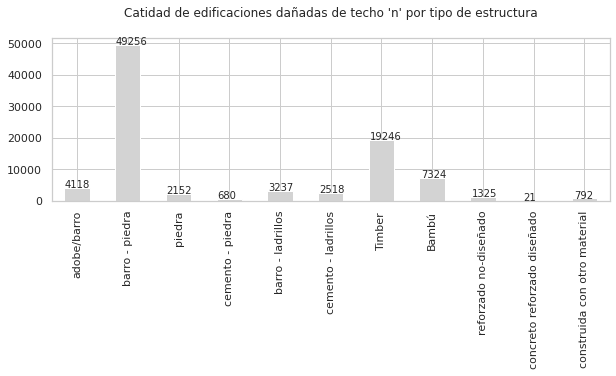

In [21]:
roof_types_Q_materials = trainValues.loc[trainValues['roof_type'] == 'q']
roof_types_Q_materials = roof_types_Q_materials.iloc[:, pd.np.r_[0, 15:26]]
roof_types_Q_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
roof_types_Q_materials = roof_types_Q_materials.set_index('building_id').sum()
ax = roof_types_Q_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de techo 'n' por tipo de estructura\n", color="lightGrey")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

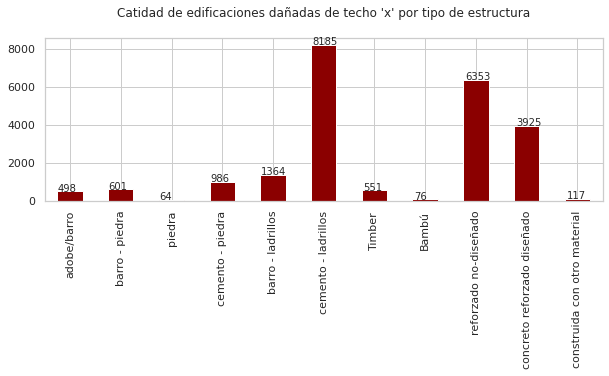

In [22]:
roof_types_X_materials = trainValues.loc[trainValues['roof_type'] == 'x']
roof_types_X_materials = roof_types_X_materials.iloc[:, pd.np.r_[0, 15:26]]
roof_types_X_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
roof_types_X_materials = roof_types_X_materials.set_index('building_id').sum()
ax = roof_types_X_materials.plot(kind="bar", title="Catidad de edificaciones dañadas de techo 'x' por tipo de estructura\n", color="DarkRed")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

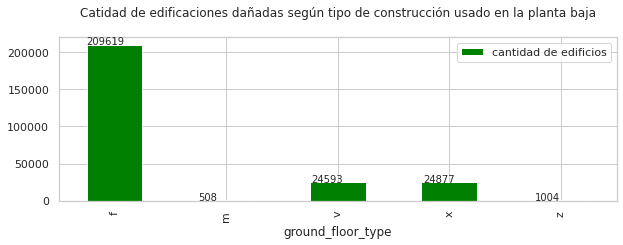

In [23]:
ground_floor_type = trainValues.loc[:, ['building_id', 'ground_floor_type']].groupby('ground_floor_type').count()
ground_floor_type.columns = ['cantidad de edificios']
ax = ground_floor_type.plot(kind="bar", title="Catidad de edificaciones dañadas según tipo de construcción usado en la planta baja\n", color="Green")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

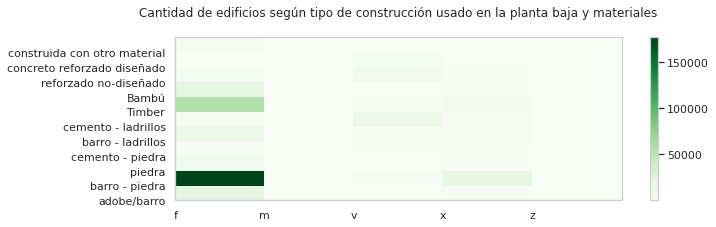

In [24]:
ground_floor_type_materials = trainValues.iloc[:, pd.np.r_[0, 11, 15:26]]
ground_floor_type_materials.columns = ['building_id', 'ground_floor_type', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
ground_floor_type_materials=ground_floor_type_materials.groupby(['building_id', 'ground_floor_type']).sum().reset_index().iloc[:, 1:13].groupby('ground_floor_type').sum()

ground_floor_type_materials = ground_floor_type_materials.transpose()
plt.pcolor(ground_floor_type_materials, cmap ="Greens")
plt.yticks(range(len(ground_floor_type_materials.index)), ground_floor_type_materials.index)
plt.xticks(range(len(ground_floor_type_materials.columns)), ground_floor_type_materials.columns)
plt.colorbar()
plt.title("Cantidad de edificios según tipo de construcción usado en la planta baja y materiales\n")
plt.show()

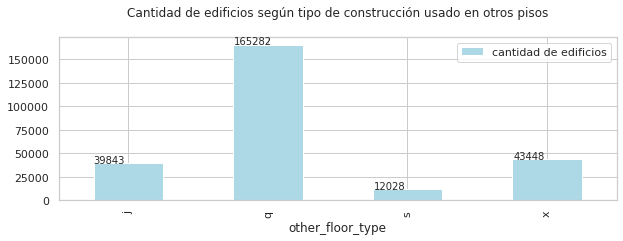

In [25]:
other_floor_type = trainValues.loc[:, ['building_id', 'other_floor_type']].groupby('other_floor_type').count()
other_floor_type.columns = ['cantidad de edificios']
ax = other_floor_type.plot(kind="bar", title="Cantidad de edificios según tipo de construcción usado en otros pisos\n", color="LightBlue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

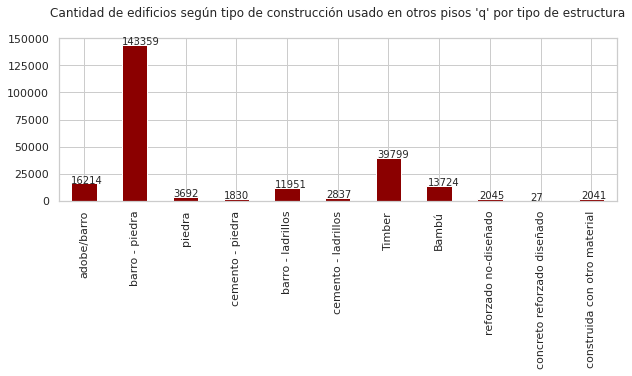

In [26]:
other_floor_type = trainValues.loc[trainValues['other_floor_type'] == 'q']
other_floor_type = other_floor_type.iloc[:, pd.np.r_[0, 15:26]]
other_floor_type.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
other_floor_type = other_floor_type.set_index('building_id').sum()
ax = other_floor_type.plot(kind="bar", title="Cantidad de edificios según tipo de construcción usado en otros pisos 'q' por tipo de estructura\n", color="DarkRed")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

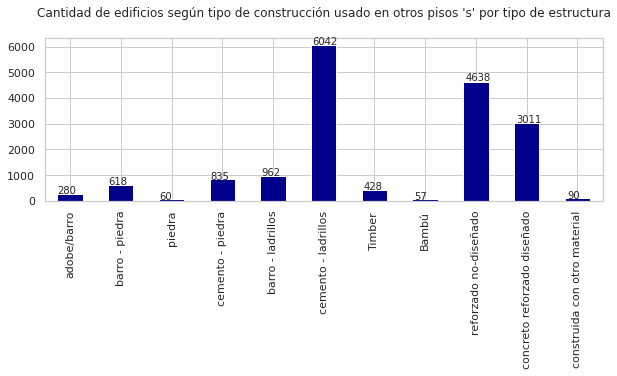

In [27]:
other_floor_type_S_materials = trainValues.loc[trainValues['other_floor_type'] == 's']
other_floor_type_S_materials = other_floor_type_S_materials.iloc[:, pd.np.r_[0, 15:26]]
other_floor_type_S_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
other_floor_type_S_materials = other_floor_type_S_materials.set_index('building_id').sum()
ax = other_floor_type_S_materials.plot(kind="bar", title="Cantidad de edificios según tipo de construcción usado en otros pisos 's' por tipo de estructura\n", color="DarkBlue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

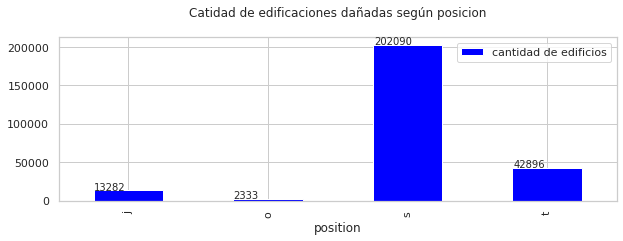

In [28]:
position = trainValues.loc[:, ['building_id', 'position']].groupby('position').count()
position.columns = ['cantidad de edificios']
ax = position.plot(kind="bar", title="Catidad de edificaciones dañadas según posicion\n", color="Blue")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

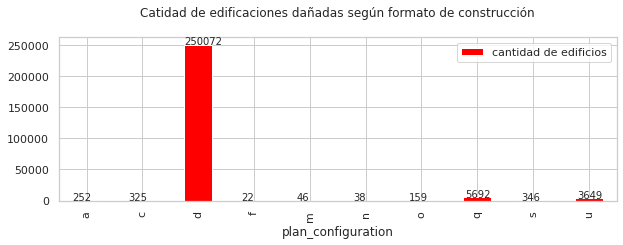

In [29]:
plan_configuration = trainValues.loc[:, ['building_id', 'plan_configuration']].groupby('plan_configuration').count()
plan_configuration.columns = ['cantidad de edificios']
ax = plan_configuration.plot(kind="bar", title="Catidad de edificaciones dañadas según formato de construcción\n", color="Red")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

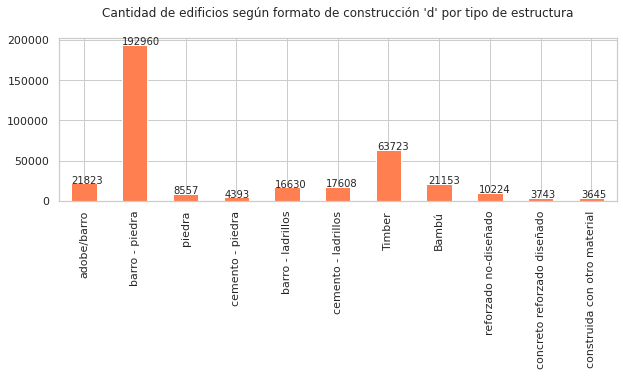

In [30]:
plan_configuration_D_materials = trainValues.loc[trainValues['plan_configuration'] == 'd']
plan_configuration_D_materials = plan_configuration_D_materials.iloc[:, pd.np.r_[0, 15:26]]
plan_configuration_D_materials.columns = ['building_id', 'adobe/barro', 'barro - piedra', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
plan_configuration_D_materials = plan_configuration_D_materials.set_index('building_id').sum()
ax = plan_configuration_D_materials.plot(kind="bar", title="Cantidad de edificios según formato de construcción 'd' por tipo de estructura\n", color="Coral")

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

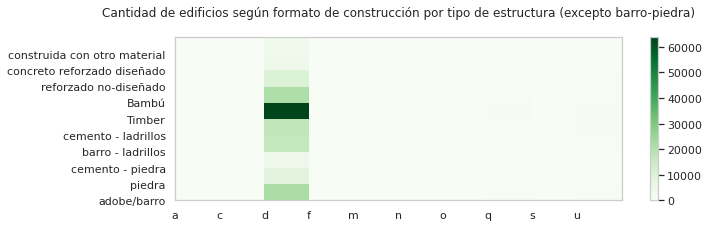

In [31]:
plan_configuration_materials = trainValues.iloc[:, pd.np.r_[0, 14, 15, 17:26]]
plan_configuration_materials.columns = ['building_id', 'plan_configuration', 'adobe/barro', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
plan_configuration_materials=plan_configuration_materials.groupby(['building_id', 'plan_configuration']).sum().reset_index().iloc[:, 1:13].groupby('plan_configuration').sum()


plan_configuration_materials = plan_configuration_materials.transpose()
plt.pcolor(plan_configuration_materials, cmap ="Greens")
plt.yticks(range(len(plan_configuration_materials.index)), plan_configuration_materials.index)
plt.xticks(range(len(plan_configuration_materials.columns)), plan_configuration_materials.columns)
plt.colorbar()
plt.title("Cantidad de edificios según formato de construcción por tipo de estructura (excepto barro-piedra)\n")
plt.show()

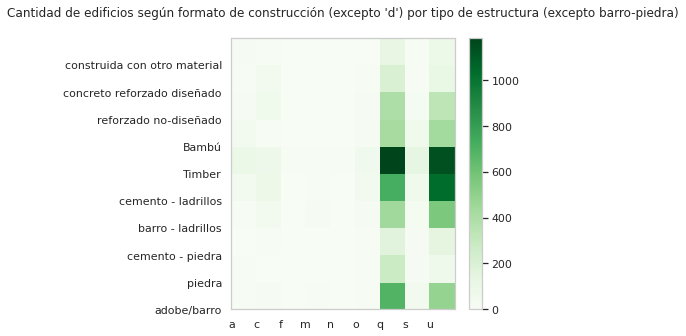

In [33]:
plan_no_D = trainValues.iloc[:, pd.np.r_[0, 14, 15, 17:26]]
plan_no_D = plan_no_D.loc[plan_no_D['plan_configuration'] != 'd']
plan_no_D.columns = ['building_id', 'plan_configuration', 'adobe/barro', 'piedra', 'cemento - piedra', 'barro - ladrillos', 'cemento - ladrillos', 'Timber', 'Bambú', 'reforzado no-diseñado', 'concreto reforzado diseñado', 'construida con otro material']
plan_no_D=plan_no_D.groupby(['building_id', 'plan_configuration']).sum().reset_index().iloc[:, 1:13].groupby('plan_configuration').sum()


plan_no_D = plan_no_D.transpose()
plt.pcolor(plan_no_D, cmap ="Greens")
plt.yticks(range(len(plan_no_D.index)), plan_no_D.index)
plt.xticks(range(len(plan_no_D.columns)), plan_no_D.columns)
plt.colorbar()
plt.title("Cantidad de edificios según formato de construcción (excepto 'd') por tipo de estructura (excepto barro-piedra)\n")
plt.show()